In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from matplotlib.patches import Rectangle

In [7]:
def criar_indices(min_i, max_i, min_j, max_j):
    import itertools
    L = list(itertools.product(range(min_i, max_i), range(min_j, max_j)))
    idx_i = np.array([e[0] for e in L])
    idx_j = np.array([e[1] for e in L])
    idx = np.vstack( (idx_i, idx_j) )
    return idx

In [38]:
def apply_transform(image, A):
    import numpy as np

    image_ = np.zeros_like(image)

    Xd = criar_indices(0, image.shape[0], 0, image.shape[1])
    Xd = np.vstack((Xd,np.ones((1,Xd.shape[1]))))
    
    X = np.linalg.inv(A) @ Xd

    X = X.astype(int)
    Xd = Xd.astype(int)

    filtro = (X[0,:]>=0)&(X[0,:]<image_.shape[0])&(X[1,:]>=0)&(X[1,:]<image_.shape[1])
    Xd = Xd[:,filtro]
    X = X[:,filtro]

    image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]
    
    return image_


def resize_image_matrix(image, width, height):
    
    tw_image = width / image.shape[1]
    th_image = height / image.shape[0]

    return np.array([
        [th_image, 0, 0], 
        [0, tw_image, 0], 
        [0, 0, 1]
    ])
    
def resize_image(image, width, height):
    A = resize_image_matrix(image, width, height)
    return apply_transform(image, A)
    
def translate_image_matrix(x, y):
    return np.array([
        [1, 0, y], 
        [0, 1, x], 
        [0, 0, 1]
    ])
    
def rotate_image_matrix(deg):
    
    return np.array([
        [np.cos(np.radians(deg)), -np.sin(np.radians(deg)), 0], 
        [np.sin(np.radians(deg)), np.cos(np.radians(deg)), 0], 
        [0, 0,1]
    ])

height 2000
width 1693
[0 0 0]


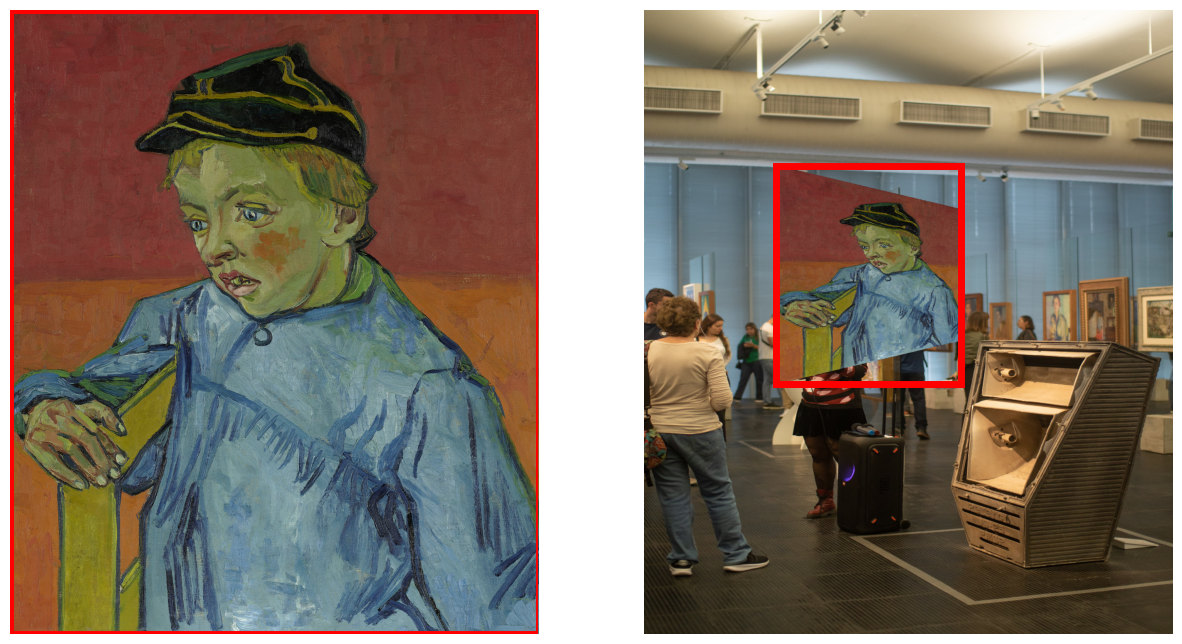

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import cv2

# Read the image
image = mpimg.imread("C:/Users/jalfr/OneDrive/Desktop/MASP/Code/Test/bounding_box/bounding_box_test/img/WEB_JB_MASP_00112_01.jpg")

fundo = mpimg.imread("C:/Users/jalfr/OneDrive/Desktop/MASP/Code/Test/bounding_box/bounding_box_test/img/6R0A8419.jpg")

height = image.shape[0]
width = image.shape[1]


print("height", height)
print("width", width)



# Define the points for the transformation
# Source points (the four corners of the part of the image you want to transform)
src_points = np.float32([[0, 0], 
                         [0, image.shape[0]], 
                         [image.shape[1], 0], 
                         [image.shape[1], image.shape[0]]])

# Destination points (the new coordinates for the corners after transformation)
dst_points = np.float32([[0, 0], 
                         [0, image.shape[0]], 
                         [image.shape[1], int(image.shape[0]/5)], 
                         [image.shape[1], int(image.shape[0] - image.shape[0]/5)]])

# Get the perspective transformation matrix
matrix = cv2.getPerspectiveTransform(src_points, dst_points)

# Perform the perspective warp
warped_image = cv2.warpPerspective(image, matrix, (image.shape[1], image.shape[0]))

ty = height / 4
tx = width / 4
tw = 0.35
th = 0.35

A = np.array([
    [th, 0, ty], 
    [0, tw, tx], 
    [0, 0, 1]
])


image_ = apply_transform(warped_image, A)

fundo = resize_image(fundo, width, height)

fundo = fundo[:image_.shape[0], :image_.shape[1]]

condition = image_ == [0,0,0]

image_[condition] = fundo[condition]

plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.gca().add_patch(patches.Rectangle((0, 0), width, height, linewidth=5, edgecolor='r', facecolor='none'))
plt.axis('off')
# plt.title('Origem')

plt.subplot(1, 2, 2)
plt.imshow(image_)
plt.gca().add_patch(patches.Rectangle((tx, ty), width * tw, height * th, linewidth=5, edgecolor='r', facecolor='none'))
plt.axis('off')
# plt.title('Destino')

plt.show()


Código do OpenCV veio daqui: https://www.geeksforgeeks.org/perspective-transformation-python-opencv/

## Sessão ChatGPT

Pergunta `flipping image through np array matrix multiplication in python`

Resposta:

Flipping an image using NumPy's array manipulation capabilities is a common technique. To do this, you can treat the image as a 2D (grayscale) or 3D (color) NumPy array and perform matrix operations to flip the image horizontally, vertically, or both.

Here's how you can flip an image using matrix multiplication in Python:
1. **Horizontal Flip**:
For a horizontal flip, you can multiply the image array by a matrix that reverses the order of the columns.

2. **Vertical Flip**:
For a vertical flip, you multiply the image array by a matrix that reverses the order of the rows.

3. **Both Horizontal and Vertical Flip**:
You can combine the two operations to flip both horizontally and vertically.

Here is a Python example using NumPy:

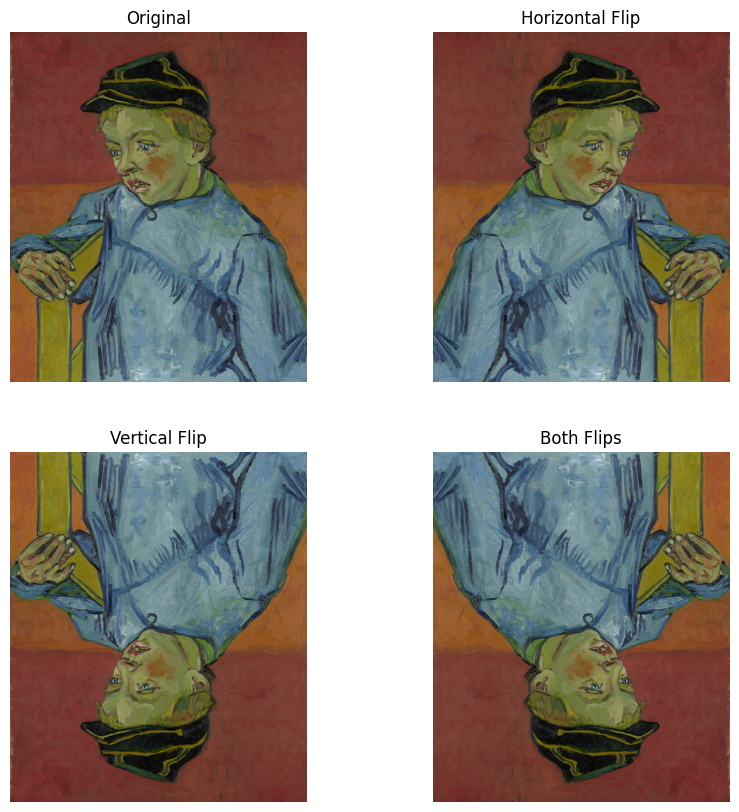

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Load an image using matplotlib (for demonstration purposes)
image = plt.imread('C:/Users/jalfr/OneDrive/Desktop/MASP/Code/Test/bounding_box/bounding_box_test/img/WEB_JB_MASP_00112_01.jpg')

# Horizontal flip
horizontal_flip = image[:, ::-1]

# Vertical flip
vertical_flip = image[::-1, :]

# Both horizontal and vertical flip
both_flip = image[::-1, ::-1]

# Display the results
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(horizontal_flip)
plt.axis('off')
plt.title("Horizontal Flip")

plt.subplot(2, 2, 3)
plt.imshow(vertical_flip)
plt.axis('off')
plt.title("Vertical Flip")

plt.subplot(2, 2, 4)
plt.imshow(both_flip)
plt.axis('off')
plt.title("Both Flips")

plt.show()


Pergunta: perspective warp image in python


To apply a perspective warp to an image using Python, you can use the cv2 library from OpenCV. Here's a step-by-step guide:

Install OpenCV (if you haven't already):

```pip install opencv-python```

Load the image and define the source and destination points.

Use `cv2.getPerspectiveTransform` to get the transformation matrix.

Apply the warp using `cv2.warpPerspective`.

Here's a code example:

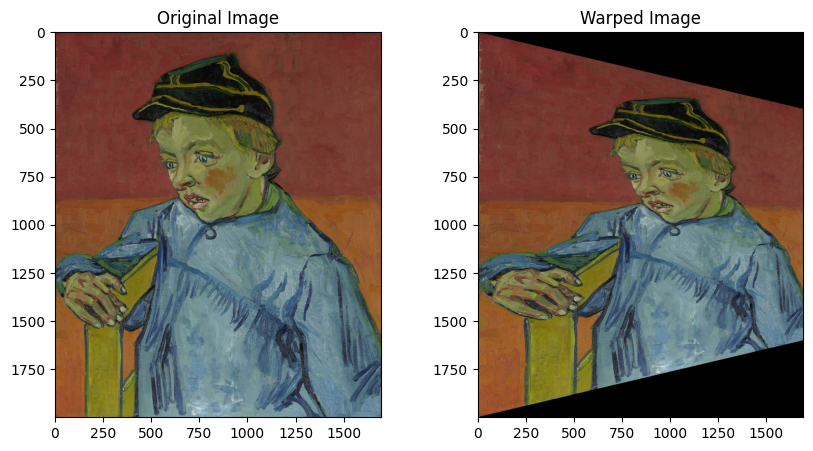

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('C:/Users/jalfr/OneDrive/Desktop/MASP/Code/Test/bounding_box/bounding_box_test/img/WEB_JB_MASP_00112_01.jpg')

# Define the points for the transformation
# Source points (the four corners of the part of the image you want to transform)
src_points = np.float32([[0, 0], 
                         [0, image.shape[0]], 
                         [image.shape[1], 0], 
                         [image.shape[1], image.shape[0]]])

# Destination points (the new coordinates for the corners after transformation)
dst_points = np.float32([[0, 0], 
                         [0, image.shape[0]], 
                         [image.shape[1], 400], 
                         [image.shape[1], image.shape[0]-400]])

# Get the perspective transformation matrix
matrix = cv2.getPerspectiveTransform(src_points, dst_points)

# Perform the perspective warp
warped_image = cv2.warpPerspective(image, matrix, (image.shape[1], image.shape[0]))

# Display the original and warped images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
plt.title("Warped Image")

plt.show()
